In [2]:
import torch
path="mtlface_checkpoints.tar"
checkpoint = torch.load(path, map_location="cpu")
print(checkpoint.keys())

/tmp/ipykernel_22622/2141994399.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location="cpu")


odict_keys(['decoder.latent_avg', 'decoder.decoder.style.1.weight', 'decoder.decoder.style.1.bias', 'decoder.decoder.style.2.weight', 'decoder.decoder.style.2.bias', 'decoder.decoder.style.3.weight', 'decoder.decoder.style.3.bias', 'decoder.decoder.style.4.weight', 'decoder.decoder.style.4.bias', 'decoder.decoder.style.5.weight', 'decoder.decoder.style.5.bias', 'decoder.decoder.style.6.weight', 'decoder.decoder.style.6.bias', 'decoder.decoder.style.7.weight', 'decoder.decoder.style.7.bias', 'decoder.decoder.style.8.weight', 'decoder.decoder.style.8.bias', 'decoder.decoder.input.input', 'decoder.decoder.conv1.conv.weight', 'decoder.decoder.conv1.conv.modulation.weight', 'decoder.decoder.conv1.conv.modulation.bias', 'decoder.decoder.conv1.noise.weight', 'decoder.decoder.conv1.activate.bias', 'decoder.decoder.to_rgb1.bias', 'decoder.decoder.to_rgb1.conv.weight', 'decoder.decoder.to_rgb1.conv.modulation.weight', 'decoder.decoder.to_rgb1.conv.modulation.bias', 'decoder.decoder.convs.0.conv.

In [4]:
import deeplake


ds = deeplake.load('hub://activeloop/cacd')
local_dir = 'local_cacd_dataset'




/

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/cacd



/

hub://activeloop/cacd loaded successfully.



In [6]:
print(ds.tensors)

{'images': Tensor(key='images'), 'keypoints': Tensor(key='keypoints')}


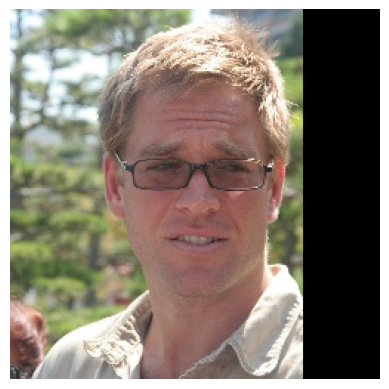

(48, 1)


In [13]:
import matplotlib.pyplot as plt

# 첫 번째 이미지 가져오기
image = ds.images[0].numpy()

# 이미지 시각화
plt.imshow(image)
plt.axis('off')  # 축 제거
plt.show()
# 첫 번째 키포인트 가져오기
keypoints = ds.keypoints[0].numpy()
print(keypoints.shape)



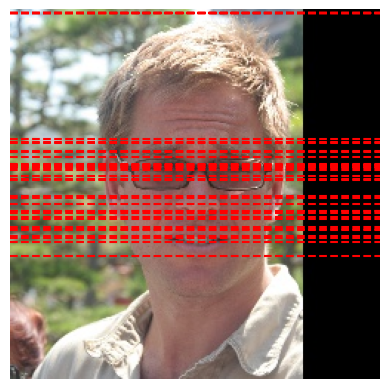

In [14]:
import matplotlib.pyplot as plt

# 첫 번째 이미지 가져오기
image = ds.images[0].numpy()

# 첫 번째 이미지의 키포인트 가져오기
keypoints = ds.keypoints[0].numpy()

# 이미지 시각화
plt.imshow(image, cmap='gray')

# 각 키포인트 시각화 (예: 각 키포인트가 이미지의 행을 나타낸다고 가정)
for kp in keypoints:
    plt.axhline(y=kp[0], color='r', linestyle='--')

plt.axis('off')
plt.show()


In [15]:
# 키포인트 값 출력
print(keypoints)


[[104]
 [105]
 [  2]
 [149]
 [107]
 [  2]
 [ 87]
 [ 96]
 [  2]
 [114]
 [ 90]
 [  2]
 [140]
 [ 89]
 [  2]
 [166]
 [ 99]
 [  2]
 [ 95]
 [105]
 [  2]
 [112]
 [106]
 [  2]
 [141]
 [106]
 [  2]
 [157]
 [108]
 [  2]
 [127]
 [131]
 [  2]
 [115]
 [136]
 [  2]
 [136]
 [137]
 [  2]
 [105]
 [153]
 [  2]
 [126]
 [148]
 [  2]
 [147]
 [154]
 [  2]]


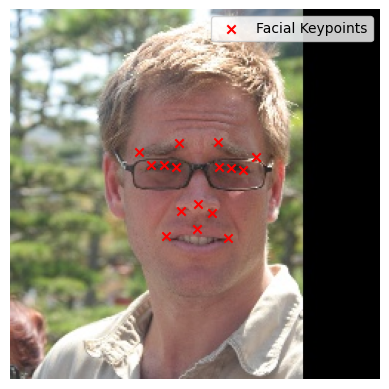

In [16]:
import numpy as np
import matplotlib.pyplot as plt


image = ds.images[0].numpy()
keypoints = ds.keypoints[0].numpy()
keypoints = keypoints.reshape(-1, 3)

xy_keypoints = keypoints[:, :2]  

plt.imshow(image)
plt.scatter(xy_keypoints[:, 0], xy_keypoints[:, 1], c='r', marker='x', label="Facial Keypoints")  
plt.legend()
plt.axis('off')
plt.show()


In [2]:

import os
import shutil

input_folder = "aligned_faces_agedb"
output_folder = "aligned_AgeDB_age"


image_files = [f for f in os.listdir(input_folder) if f.endswith('.jpg')]


for image in image_files:
        parts = image.split("_")
          
        label, name, age, gender_ext = parts[0], parts[1], parts[2], parts[3]
        
        age = int(age)

        gender = gender_ext.split('.')[0]
        age_group = f"{(age // 10) * 10}"
        name_gender_folder = f"{name}_{gender}"
        age_group_folder = os.path.join(output_folder, age_group) 
        person_folder = os.path.join(age_group_folder, name_gender_folder) 

        os.makedirs(person_folder, exist_ok=True)

        source_path = os.path.join(input_folder, image)
        destination_path = os.path.join(person_folder, image)


        shutil.copy(source_path, destination_path)





✅ 모든 이미지 정리가 완료되었습니다!


In [23]:
#genuine folder 생성 코드

import os
import shutil
from itertools import combinations

# 폴더 경로 
input_folder = "aligned_AgeDB_age/0"

# 쌍을 저장할 폴더
output_folder = "gen"
os.makedirs(output_folder, exist_ok=True)  # gen 폴더 생성

# 전체 인덱스 초기화
global_index = 0

# 10대 폴더 내의 각 "이름_성별" 폴더를 순회
for person_folder in os.listdir(input_folder):
    person_path = os.path.join(input_folder, person_folder)

    # 폴더가 아니라면 건너뛰기
    if not os.path.isdir(person_path):
        continue

    # 해당 폴더 안의 이미지 파일 가져오기
    image_files = sorted([f for f in os.listdir(person_path) if f.endswith('.jpg')])

    # 가능한 모든 쌍 생성 (2개씩)
    pairs = list(combinations(image_files, 2))  # 모든 조합 생성

    # 쌍을 `gen/` 폴더에 저장
    for img1, img2 in pairs:
        pair_folder = os.path.join(output_folder, str(global_index))  #인덱스별 폴더 생성
        os.makedirs(pair_folder, exist_ok=True)

        # 원본 이미지 경로
        source1 = os.path.join(person_path, img1)
        source2 = os.path.join(person_path, img2)

        # 저장할 경로
        dest1 = os.path.join(pair_folder, f"pair1_{img1}")
        dest2 = os.path.join(pair_folder, f"pair2_{img2}")

        # 이미지 복사
        shutil.copy(source1, dest1)
        shutil.copy(source2, dest2)

        # 인덱스 증가
        global_index += 1




In [38]:
#imposter folder 생성 코드
import os
import shutil
import random
from concurrent.futures import ThreadPoolExecutor

# 폴더 경로
input_folder = "aligned_AgeDB_age/100"  # 실제 폴더명을 확인 후 수정하세요.

# 생성된 쌍을 저장할 폴더
output_folder = "imp"
os.makedirs(output_folder, exist_ok=True)

# 성별별로 폴더 정리
male_folders = []
female_folders = []
person_images = {}

# 사람별 이미지 리스트 저장 
for person_folder in os.listdir(input_folder):
    folder_path = os.path.join(input_folder, person_folder)
    if not os.path.isdir(folder_path):
        continue
    
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    if not image_files:
        continue  # 이미지가 없는 경우 스킵

    # 파일명에서 성별 추출 (예: 0_JohnDoe_17_m.jpg)
    gender = image_files[0].split('_')[-1].split('.')[0]  # 확장자 제거 후 마지막 요소 추출

    # 성별을 구분하여 저장
    person_images[person_folder] = image_files
    if gender == 'm':
        male_folders.append(person_folder)
    elif gender == 'f':
        female_folders.append(person_folder)

#  무작위 쌍 생성
pair_list = []
gender_groups = [male_folders, female_folders]  # 성별 그룹

while len(pair_list) <1:
    gender_group = random.choice(gender_groups)  # 랜덤하게 성별 선택

    if len(gender_group) < 2:
        continue  # 최소 2명이 있어야 쌍을 만들 수 있음

    person1, person2 = random.sample(gender_group, 2)

    # 각 폴더에서 랜덤하게 1장씩 이미지 선택
    if not person_images[person1] or not person_images[person2]:
        continue  # 이미지가 없는 경우 다시 시도

    img1 = random.choice(person_images[person1])
    img2 = random.choice(person_images[person2])

    pair_list.append((person1, img1, person2, img2))

# 멀티스레딩을 이용해 빠르게 파일 복사
def copy_images(pair_data, idx):
    person1, img1, person2, img2 = pair_data
    pair_folder = os.path.join(output_folder, str(idx))
    os.makedirs(pair_folder, exist_ok=True)

    # 원본 이미지 경로
    source1 = os.path.join(input_folder, person1, img1)
    source2 = os.path.join(input_folder, person2, img2)

    # 저장할 경로
    dest1 = os.path.join(pair_folder, f"pair1_{img1}")
    dest2 = os.path.join(pair_folder, f"pair2_{img2}")

    shutil.copy(source1, dest1)
    shutil.copy(source2, dest2)

# 병렬로 파일 복사 실행
with ThreadPoolExecutor(max_workers=8) as executor:
    executor.map(copy_images, pair_list, range(len(pair_list)))

